In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2
import skimage.io as io

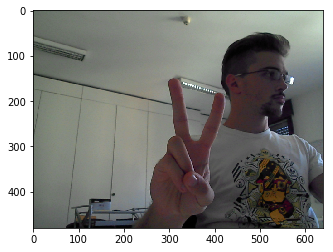

In [213]:
img = io.imread("1-color_2.png")
plt.imshow(img)


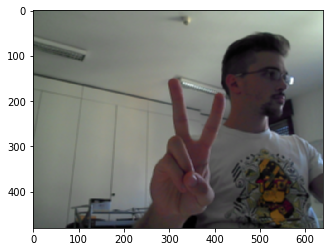

In [214]:
img = cv2.GaussianBlur(img,(5,5),4)
plt.imshow(img)

In [216]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

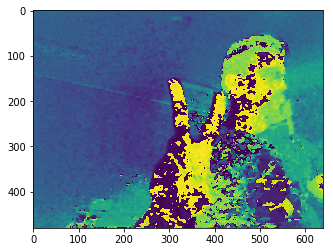

In [217]:
plt.imshow(img_hsv[:, :, 0])

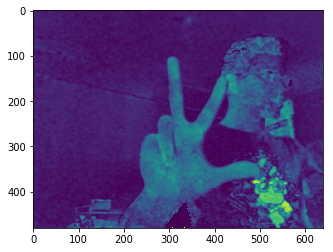

In [200]:
plt.imshow(img_hsv[:, :, 1])

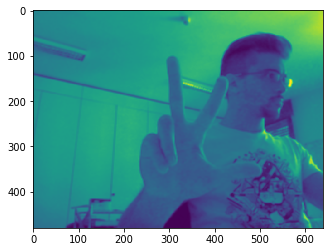

In [201]:
plt.imshow(img_hsv[:, :, 2])

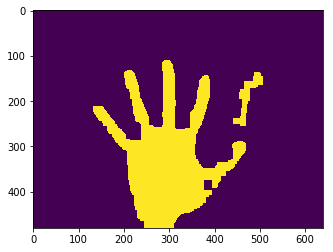

In [152]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, black_tophat
# 315, 94, 37
lower = np.array([170, 30, 80])
upper = np.array([180, 100, 255])
# lower_red = np.array([160, 0, 0])
# upper_red = np.array([190, 255, 255])

mask = cv2.inRange(img_hsv, lower, upper)

# mask = cv2.GaussianBlur(mask,(5,5),10)

mask = mask.astype(np.uint8)
kernel = np.ones((15,15))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((10,10))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
kernel = np.ones((17,17))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# # mask_red[mask_red != 255] = 0


mask = mask.astype(np.float32)

plt.imshow(mask)

In [9]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

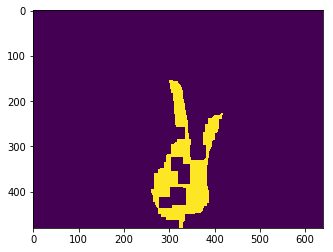

In [218]:
lower = np.array([170, 30, 70])
upper = np.array([180, 100, 255])
# lower_red = np.array([160, 0, 0])
# upper_red = np.array([190, 255, 255])

mask = cv2.inRange(img_hsv, lower, upper)

# mask = cv2.GaussianBlur(mask,(5,5),10)

mask = mask.astype(np.uint8)
kernel = np.ones((25,25))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((5,5))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
kernel = np.ones((27,27))
# mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# # mask_red[mask_red != 255] = 0


mask = mask.astype(np.float32)

plt.imshow(mask)